# Лабораторная работа №1

_Выполнили: Гуревич Михаил и Трохан Александр, M32001_


## Подготовка


Для выполнения обеих частей работы требуется выбрать две произвольные функции (обозначим их через $f_1(x)$ и $f_2(x)$, $f_3(x)$ и $f_4(x)$ соответсвенно). В качестве функций для дифференцирования возьмем $f_1(x) = x^{\sin(x^{2})}$ и $f_2(x) = x^4 \cos(10x^4)$. В качетсве функций для интегрирования возьмём $f_3(x) = x \sin(x^2)$ и $f_4(x) = x \cos(x^2) \cdot e^{\sin(x^2)}$.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def f_1(x):
    return np.power(x, np.sin(np.power(x, 2)))

def f_2(x):
    return np.cos(10 * np.power(x, 4)) * np.power(x, 4)

def f_3(x):
    return x * np.sin(np.power(x, 2))

def f_4(x):
    return x * np.cos(np.power(x, 2)) * np.exp(np.sin(np.power(x, 2)))

### Вспомогательные функции


In [75]:
# среднеквадратичное отклонение
def standard_deviation(real, approx):
    return np.sqrt(np.mean(np.power(real - approx, 2)))

## Метод численного дифференцирования


Реализуем численные методы дифференцирования: метод правой разностной производной, метод левой разностной производной и метод центральной разностной производной.


In [76]:
# методы для вычисления значения производной в точке

def right_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def left_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def central_diff_leftmost(f, x, h):  # для самой левой точки
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def central_diff_rightmost(f, x, h):  # для самой правой точки
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

In [77]:
# методы для вычисления значений производной на отрезке

def right_diff_on_segment(f, a, b, h):
    x = np.arange(a, b, h)  # массив значений аргумента
    return right_diff(f, x, h)

def left_diff_on_segment(f, a, b, h):
    x = np.arange(a, b, h)  # массив значений аргумента
    return left_diff(f, x, h)

def central_diff_on_segment(f, a, b, h):
    x = np.arange(a, b, h)  # массив значений аргумента
    return np.array([central_diff(f, x[i], h) if i != 0 and i != len(x) - 1 else central_diff_leftmost(f, x[i], h) if i == 0 else central_diff_rightmost(f, x[i], h) for i in range(len(x))])

Построим графики функций их производных.

In [78]:
# реальные производные
def f_1_derivative(x):
    return np.power(x, np.sin(np.power(x, 2)) - 1) * (np.sin(np.power(x, 2)) + 2 * np.power(x, 2) * np.log(x) * np.cos(np.power(x, 2)))

def f_2_derivative(x):
    return 4 * np.power(x, 3) * np.cos(10 * np.power(x, 4)) - 40 * np.power(x, 7) * np.sin(10 * np.power(x, 4))

График f_1(x) и f_1'(x):


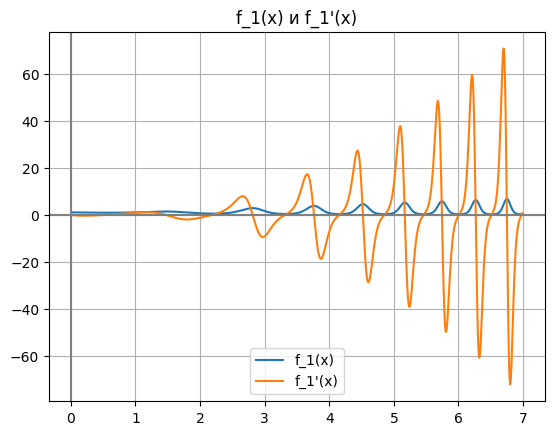

График f_2(x) и f_2'(x):


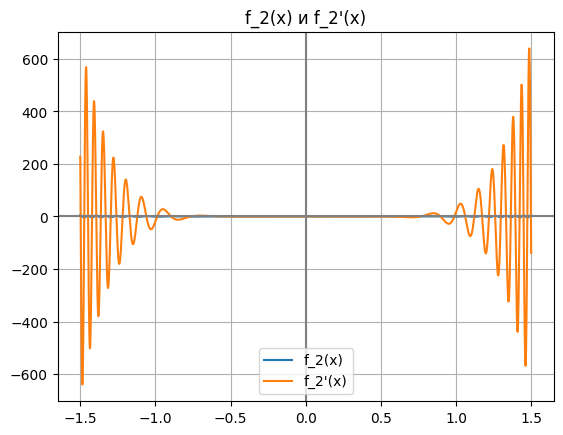

In [79]:
# построение графиков функций и их производных
print("График f_1(x) и f_1\'(x):")
x = np.arange(0.01, 7, 0.01)
plt.plot(x, f_1(x), label="f_1(x)")
plt.plot(x, f_1_derivative(x), label="f_1\'(x)")
plt.legend()
plt.grid()
plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.title("f_1(x) и f_1\'(x)")
plt.show()

print("График f_2(x) и f_2\'(x):")
x = np.arange(-1.5, 1.5, 0.001)
plt.plot(x, f_2(x), label="f_2(x)")
plt.plot(x, f_2_derivative(x), label="f_2\'(x)")
plt.legend()
plt.grid()
plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.title("f_2(x) и f_2\'(x)")
plt.show()

Вычислим значения численной производной в узлах сетки для разных значений шага $h$.


In [80]:
# функция для построения графика результата вычисления производной (реального значения, аппроксимации справа, слева, центральной разности)
def plot_results(a, b, result, func_name):
    print(f"Результаты для {func_name}:")
    for h in result.keys():
        plt.plot(np.arange(a, b, h), result[h]["real"], label="real")
        plt.plot(np.arange(a, b, h), result[h]["approx_right"], label="right")
        plt.plot(np.arange(a, b, h), result[h]["approx_left"], label="left")
        plt.plot(np.arange(a, b, h), result[h]["approx_central"], label="central")
        plt.legend()
        plt.grid()
        plt.axhline(y=0, color="grey")
        plt.title(f"h = {h}")
        plt.show()

Результаты для f_1:


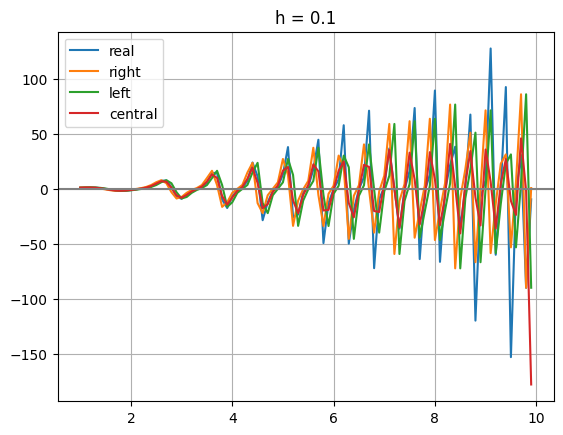

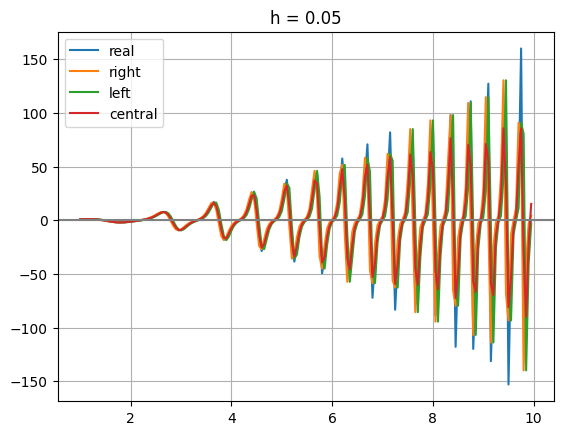

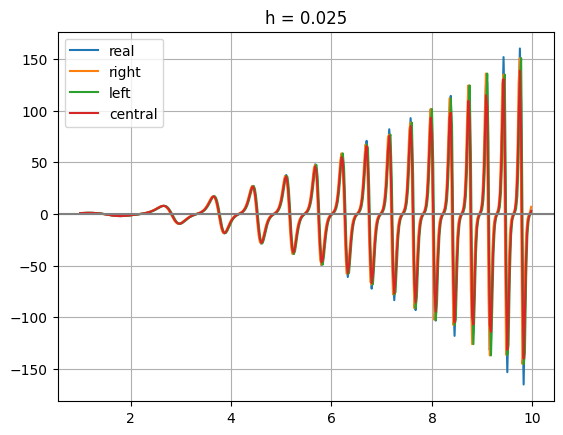

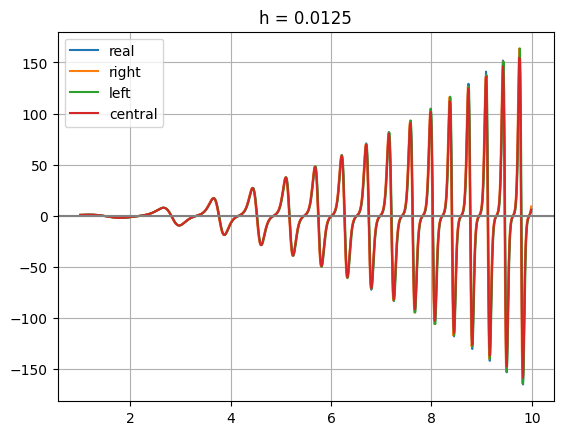

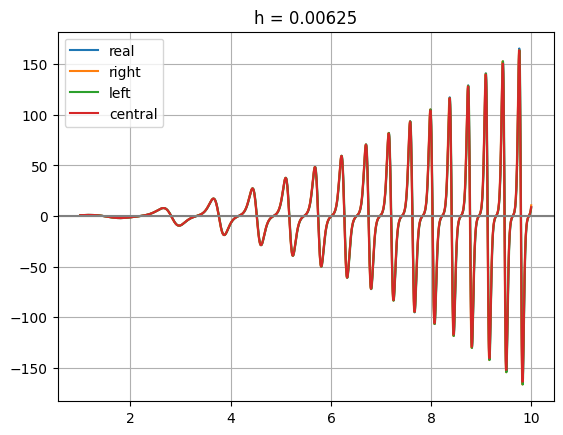

In [103]:
# для f_1
h_start = 0.1
a, b = 1, 10
f_1_result = dict(zip([h_start / (2 ** i) for i in range(5)], [{} for _ in range(5)]))
for h in f_1_result.keys():
    f_1_result[h]["real"] = f_1_derivative(np.arange(a, b, h))
    f_1_result[h]["approx_right"] = right_diff_on_segment(f_1, a, b, h)
    f_1_result[h]["approx_left"] = left_diff_on_segment(f_1, a, b, h)
    f_1_result[h]["approx_central"] = central_diff_on_segment(f_1, a, b, h)

plot_results(a, b, f_1_result, "f_1")

Результаты для f_2:


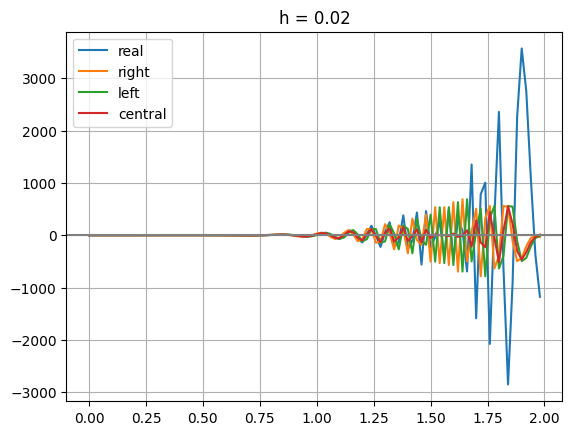

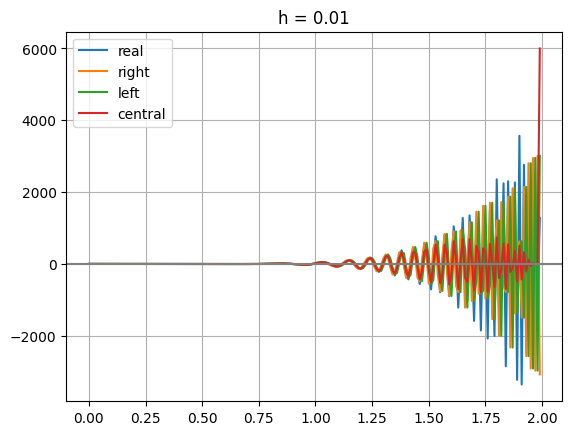

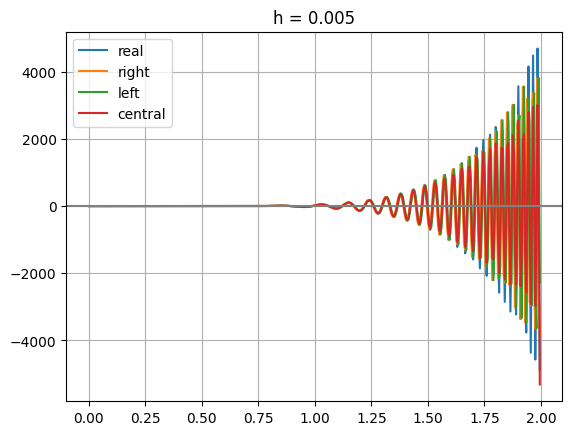

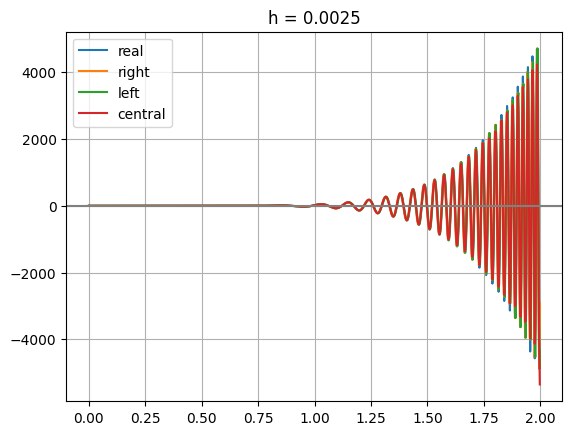

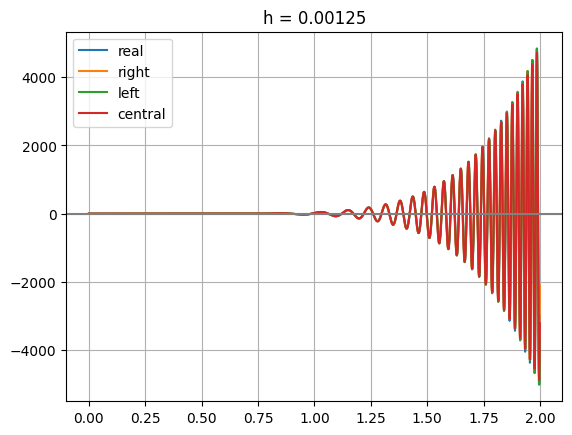

In [104]:
# для f_2
h_start = 0.02
a, b = 0, 2
f_2_result = dict(zip([h_start / (2 ** i) for i in range(5)], [{} for _ in range(5)]))
for h in f_2_result.keys():
    f_2_result[h]["real"] = f_2_derivative(np.arange(a, b, h))
    f_2_result[h]["approx_right"] = right_diff_on_segment(f_2, a, b, h)
    f_2_result[h]["approx_left"] = left_diff_on_segment(f_2, a, b, h)
    f_2_result[h]["approx_central"] = central_diff_on_segment(f_2, a, b, h)

plot_results(a, b, f_2_result, "f_2")

Определим среднеквадратичное отклонение.

In [82]:
# функция для построения графика среднеквадратичного отклонения в зависимости от h
def plot_deviation(result, func_name):
    print(f"Среднеквадратичное отклонение для {func_name}:")
    h = list(result.keys())
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["approx_right"]) for i in result.keys()], label="right", color="tab:orange")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["approx_left"]) for i in result.keys()], label="left", color="tab:green")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["approx_central"]) for i in result.keys()], label="central", color="tab:red")
    plt.legend()
    plt.grid()
    plt.axhline(y=0, color="grey")
    plt.xlabel("h")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title("Среднеквадратичное отклонение от h")
    plt.show()

Среднеквадратичное отклонение для f_1:


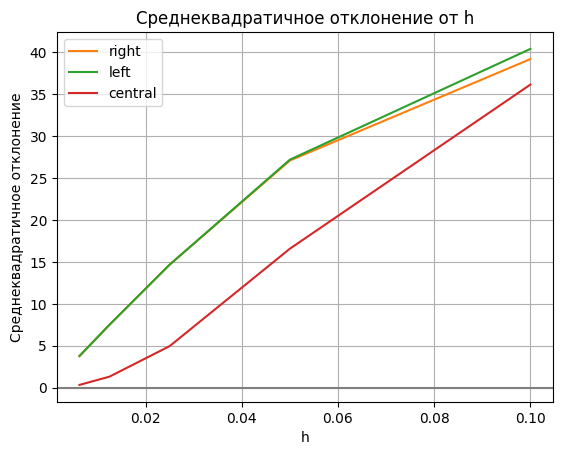

Среднеквадратичное отклонение для f_2:


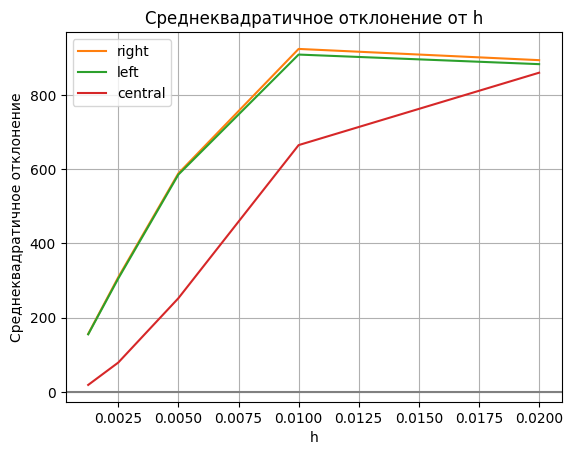

In [83]:
plot_deviation(f_1_result, "f_1")
plot_deviation(f_2_result, "f_2")

## Методы численного интегрирования

Для наглядности построим графики функций $f_3(x)$ и $f_4(x)$.

График f_3(x):


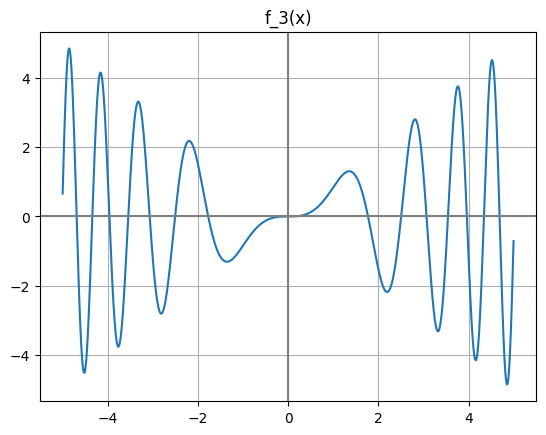

График f_4(x):


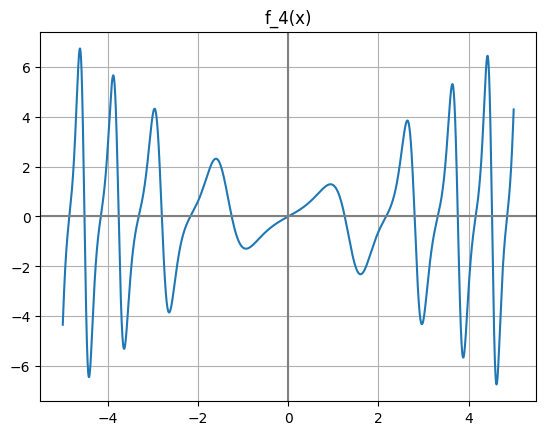

In [84]:
print("График f_3(x):")
x = np.arange(-5, 5, 0.001)
plt.plot(x, f_3(x), label="f_3(x)")
plt.grid()
plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.title("f_3(x)")
plt.show()

print("График f_4(x):")
x = np.arange(-5, 5, 0.001)
plt.plot(x, f_4(x), label="f_4(x)")
plt.grid()
plt.axhline(y=0, color="grey")
plt.axvline(x=0, color="grey")
plt.title("f_4(x)")
plt.show()

Для начала определим функции, которые вычисляют знаечние интеграла с помощью первообразной.

In [85]:
# реальные интегралы
def f_3_integral(a, b):
    return 0.5 * (np.cos(np.power(a, 2))) - 0.5 * (np.cos(np.power(b, 2)))

def f_4_integral(a, b):
    return 0.5 * (np.exp(np.sin(np.power(b, 2))) - np.exp(np.sin(np.power(a, 2))))

Реализуем методы численного интегрирования. Каждый метод использует различные формулы для вычисления площадей криволинейных трапеций, на которые разбивается исходный интеграл. Поэтому нами будут реализованы следующие формулы: формула левых, правых и средних прямоугольников, формула трапеций и формула Симпсона.

In [86]:
def left_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a, b, h)) * h)

def right_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a + h, b + h, h)) * h)

def central_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a + h / 2, b + h / 2, h)) * h)

def trapezoidal(f, a, b, h):
    return h / 2 * (f(a) + f(b) + 2 * np.sum(f(np.arange(a + h, b, h))))

def simpson(f, a, b, h):
    return h / 3 * (f(a) + f(b) + 4 * np.sum(f(np.arange(a + h, b, 2 * h))) + 2 * np.sum(f(np.arange(a + 2 * h, b, 2 * h))))

Теперь посчитаем значение интеграла с помощью каждого из методов для различных значений шага $h$.

In [124]:
# функция для вывода результата в виде таблицы
def print_result(result, func_name):
    print(f"Результаты для {func_name}:")
    df = pd.DataFrame(result)
    df.index = ["real", "left", "right", "central", "trapezoidal", "simpson"]
    # round results inside df to 3 digits
    print(df.round(4).T)

In [125]:
# для f_3
h_start = 0.1
a, b = 0, 10
f_3_result = dict(zip([h_start / (2 ** i) for i in range(5)], [{} for _ in range(5)]))
for h in f_3_result.keys():
    f_3_result[h]["real"] = f_3_integral(a, b)
    f_3_result[h]["left_rects"] = left_rectangles(f_3, a, b, h)
    f_3_result[h]["right_rects"] = right_rectangles(f_3, a, b, h)
    f_3_result[h]["central_rects"] = central_rectangles(f_3, a, b, h)
    f_3_result[h]["trapezoidal"] = trapezoidal(f_3, a, b, h)
    f_3_result[h]["simpson"] = simpson(f_3, a, b, h)

print_result(f_3_result, "f_3")


Результаты для f_3:
           real    left   right  central  trapezoidal  simpson
0.10000  0.0688  0.4757 -0.0307  -0.0120       0.2225   0.0026
0.05000  0.0688  0.2319 -0.0213   0.0504       0.1053   0.0662
0.02500  0.0688  0.1411  0.0145   0.0643       0.0778   0.0687
0.01250  0.0688  0.1027  0.0394   0.0677       0.0711   0.0688
0.00625  0.0688  0.0852  0.0536   0.0686       0.0694   0.0688


In [131]:
# для f_4
h_start = 0.5
a, b = 5, 20
f_4_result = dict(zip([h_start / (2 ** i) for i in range(5)], [{} for _ in range(5)]))
for h in f_4_result.keys():
    f_4_result[h]["real"] = f_4_integral(a, b)
    f_4_result[h]["left_rects"] = left_rectangles(f_4, a, b, h)
    f_4_result[h]["right_rects"] = right_rectangles(f_4, a, b, h)
    f_4_result[h]["central_rects"] = central_rectangles(f_4, a, b, h)
    f_4_result[h]["trapezoidal"] = trapezoidal(f_4, a, b, h)
    f_4_result[h]["simpson"] = simpson(f_4, a, b, h)

print_result(f_4_result, "f_4")

Результаты для f_4:
           real     left    right  central  trapezoidal  simpson
0.50000 -0.2245 -17.8174 -22.2314  58.7998     -20.0244 -34.5363
0.25000 -0.2245  20.4912  18.2842 -31.0247      19.3877  32.5251
0.12500 -0.2245  -5.2667  -6.3702   1.6929      -5.8185 -14.2205
0.06250 -0.2245  -1.7869  -2.3387   1.6382      -2.0628  -0.8109
0.03125 -0.2245  -0.0744  -0.3503  -0.2232      -0.2123   0.4045


Определим среднеквадратичное отклонение.

In [90]:
# функция для построения графика среднеквадратичного отклонения в зависимости от h
def plot_integral_deviation(result, func_name):
    print(f"Среднеквадратичное отклонение для {func_name}:")
    h = list(result.keys())
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["left_rects"]) for i in result.keys()], label="left", color="tab:blue")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["right_rects"]) for i in result.keys()], label="right", color="tab:orange")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["central_rects"]) for i in result.keys()], label="central", color="tab:green")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["trapezoidal"]) for i in result.keys()], label="trapezoidal", color="tab:red")
    plt.plot(h, [standard_deviation(result[i]["real"], result[i]["simpson"]) for i in result.keys()], label="simpson", color="tab:purple")
    plt.legend()
    plt.grid()
    plt.axhline(y=0, color="grey")
    plt.xlabel("h")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title("Среднеквадратичное отклонение от h")
    plt.show()

Среднеквадратичное отклонение для f_3:


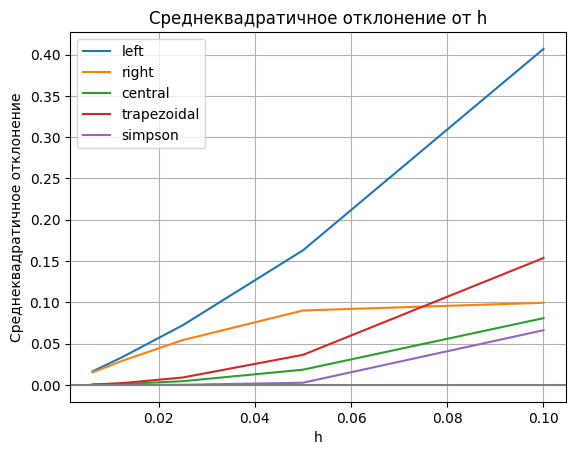

Среднеквадратичное отклонение для f_4:


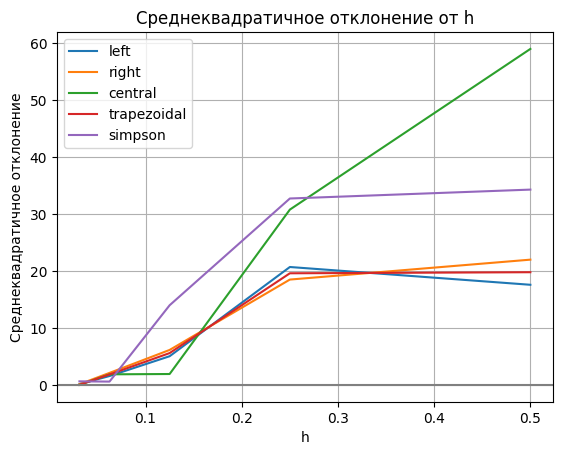

In [132]:
plot_integral_deviation(f_3_result, "f_3")
plot_integral_deviation(f_4_result, "f_4")